<a href="https://colab.research.google.com/github/CaioPinho9/data-science/blob/main/dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando a biblioteca e lendo o banco de dados original

In [2]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

Média de todas as metragens

In [ ]:
dados.Metragem.mean()

442.30065947242207

Bairro da linha 667

In [ ]:
dados["Bairro"][667]

'Vila Ida'

Quantas vezes o bairro vila mariana aparece no banco de dados

In [ ]:
sum(dados.Bairro == "Vila Mariana")

184

In [ ]:
tem_imoveis_vila = (dados.Bairro == "Vila Mariana")
tem_imoveis_vila

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

Uma tabela com o bairro vila mariana em todas as linhas

In [ ]:
imoveis_vila_mariana = dados[tem_imoveis_vila]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


Média de metragem no bairro vila mariana

In [ ]:
imoveis_vila_mariana.Metragem.mean()

233.6195652173913

Quantas vezes cada bairro aparece

In [ ]:
dados.Bairro.value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

Gráfico mostrando os 10 bairros com maior frequência

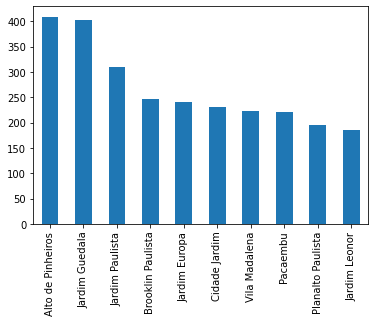

In [ ]:
n_imoveis_bairro = dados["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()

Média da metragem de cada bairro

In [3]:
bairro = []
for element in dados.Bairro:
  if not element in bairro:
    bairro.append(element)
for element in bairro:
  print(element)
  print(dados[dados.Bairro == element].Metragem.mean())
  print("")

Planalto Paulista
324.34871794871793

Jardim dos Estados
594.7272727272727

Jardim Reimberg
125.0

Jardim Morumbi
624.457627118644

Mooca
177.0

Santo Amaro
381.2049689440994

Cidade Mãe do Céu
132.25

Jardim Vergueiro
150.0

Jardim Benfica
48.0

Vila Alpina
171.66666666666666

Vila Monumento
251.01149425287358

Jardim Luzitânia
490.734693877551

Vila Uberabinha
199.6

Jardim Prudência
281.27272727272725

Lauzane Paulista
161.14285714285714

Jardim Santa Maria
131.66666666666666

Vila Nova
180.0

Itaberaba
199.75

Vila Nova Conceição
298.77570093457945

Jardim da Saúde
245.4047619047619

Jardim Santo Antônio
250.0

Vila Mazzei
134.07692307692307

Vila Madalena
334.67410714285717

Jardim Ivana
250.0

Vila Campo Grande
167.47058823529412

Vila Gomes Cardim
217.06666666666666

Bela Aliança
345.4761904761905

Vila Albertina
333.05882352941177

Cidade Jardim
697.3347826086956

Parque da Lapa
164.0

Vila Libanesa
205.66666666666666

Cidade Domitila
175.5

Vila Nova Savoia
325.0

Jardim Maria

Aqui é feita a formatação do dinheiro, separando a Moeda e os imóveis que estão sendo alugados

In [5]:
dados[["Moeda", "Valor_vendas", "Tipo_vendas"]] = dados["Valor"].str.split(expand = True)
dados_vendas = dados[dados["Tipo_vendas"].isna()]
dados_vendas["Valor_vendas_float"] = dados_vendas["Valor_vendas"].str.replace(".","").astype(float)
dados_vendas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_vendas,Tipo_vendas,Valor_vendas_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.0
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0


O gráfico a seguir mostra os valores inteiros e em milhões

In [6]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
dados_vendas["Valor_vendas_milhoes"] = dados_vendas['Valor_vendas_float']/1000000

dados_vendas.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Metragem,Quartos,Banheiros,Vagas,Valor_vendas_float,Valor_vendas_milhoes
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,3.05
std,7856.42,1.05,1.97,2.60,3944208.19,3.94
min,10.00,1.00,1.00,1.00,13000.00,0.01
25%,168.00,3.00,2.00,2.00,890000.00,0.89
50%,276.00,3.00,4.00,4.00,1800000.00,1.80
75%,450.00,4.00,5.00,5.00,3500000.00,3.50
max,750000.00,16.00,40.00,50.00,65000000.00,65.00


Adicionando uma coluna para poder analizar o preço por metragem

In [7]:
dados_vendas["Valor_metragem"] = dados_vendas["Valor_vendas_float"]/dados_vendas["Metragem"]
dados_vendas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_vendas,Tipo_vendas,Valor_vendas_float,Valor_vendas_milhoes,Valor_metragem
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,1.50,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,0.67,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,2.30,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,1.05,5121.95


Uma tabela para analizar as médias de cada bairro

In [8]:
dados_bairro = dados_vendas.groupby("Bairro").mean()
dados_bairro["Valor_metragem_bairro"] = dados_bairro["Valor_vendas_float"]/dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_vendas_float,Valor_vendas_milhoes,Valor_metragem,Valor_metragem_bairro
Bairro,,,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,1.76,7656.17,7162.69
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,2.39,5849.57,5708.74
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,2.08,7606.73,6961.30
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,1.18,5691.74,4385.00
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,4.78,11269.98,11126.34
...,...,...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,0.65,4467.13,4283.84
Água Branca,173.58,3.08,3.25,2.25,1226500.00,1.23,7269.11,7065.77
Água Fria,165.42,2.83,3.42,2.50,927083.33,0.93,5841.10,5604.53


Gráfico de barras mostrando o valor médio da metragem por bairro

Text(0, 0.5, 'Valor Médio da Metragem')

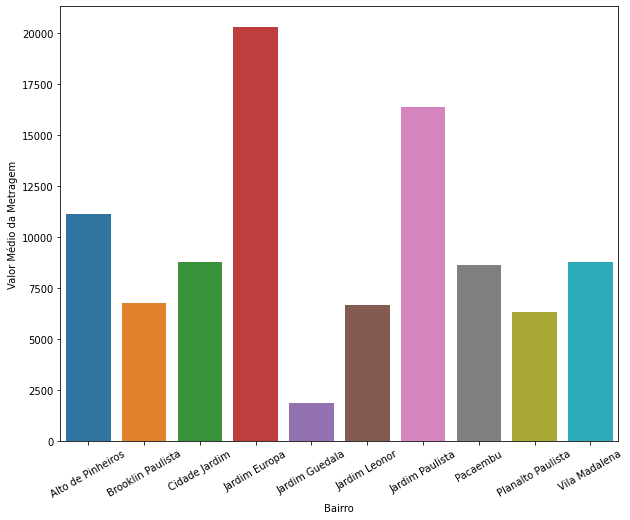

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
dados_bairro.reset_index(inplace = True)

plt.figure(figsize=(10,8))
ax = sns.barplot(x="Bairro", y="Valor_metragem_bairro", data=dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis="x", rotation=30)
ax.set_ylabel("Valor Médio da Metragem")

Gráfico boxplot mostrando o valor médio da metragem por bairro

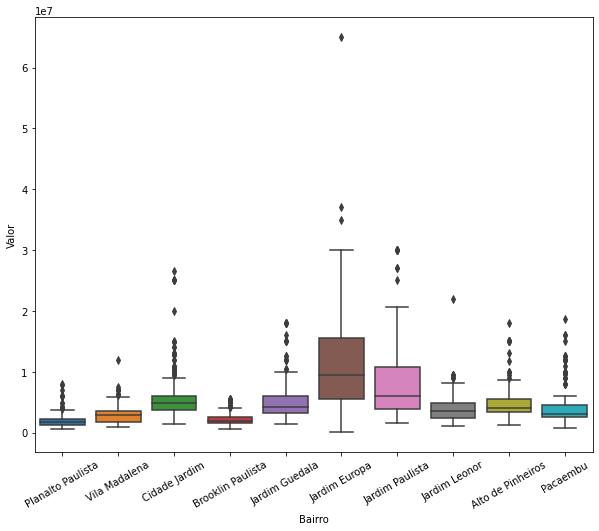

In [11]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros"), x="Bairro",y="Valor_vendas_float")
ax.tick_params(axis="x",rotation=30)
ax.set_ylabel("Valor")
plt.show()

Gráfico boxplot da metragem por bairro

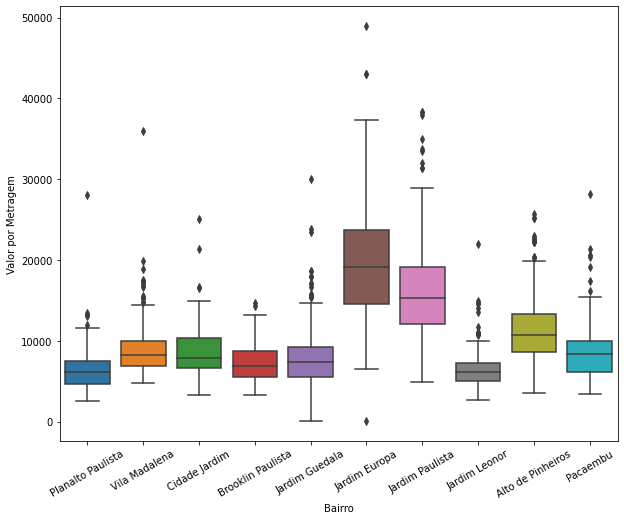

In [10]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros"), x="Bairro",y="Valor_metragem")
ax.tick_params(axis="x",rotation=30)
ax.set_ylabel("Valor por Metragem")
plt.show()

Formatação do censo do IBGE 2010

In [77]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
ibge = pd.read_csv(ibge_url, encoding="ISO-8859-1", sep=";", thousands=".", decimal=",")
ibge.dropna(how="all", axis=1, inplace=True)
ibge.Nome_Grande_Regiao = "Regiao Sudeste"
ibge.Nome_da_meso = "Metropolitana de Sao Paulo"
ibge.Nome_da_micro = "Sao Paulo"
ibge["Nome_da_UF "] = "Sao Paulo"
ibge.rename(columns = {'Cod_Grandes Regiï¿½es':'Cod_Grandes_Regioes'}, inplace = True)
ibge

,Cod_setor,Cod_Grandes_Regioes,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,355030896000243,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,...,3.50,2.61,772.09,168751.10,814.52,143188.21,467.46,191332.48,699.95,123399.08
18359,355030896000244,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,...,3.87,2.49,692.50,239941.27,812.93,182516.20,439.33,194034.99,702.10,124952.38
18360,355030896000245,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,...,3.90,2.54,630.06,329705.22,843.31,260395.90,347.60,228162.66,767.50,181129.99
18361,355030896000246,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,...,4.29,4.21,597.37,349101.00,908.00,244391.67,397.76,436942.16,854.20,550319.43


Banco de dados de endereços de SP

In [27]:
from google.colab import drive
drive.mount('/content/drive')

enderecos = pd.read_csv(r"/content/drive/MyDrive/Aulas/Data-Science/enderecos.csv")
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini
...,...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27,rua daniel buccieri
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83,rua ottorino rizzi
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74,rua adriano michelutti cândia
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08,rodovia mario tonolli


Formatando a rua do primeiro banco de dados

In [ ]:
dados_vendas["Apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')
dados_vendas["Apenas_rua"] = dados_vendas["Apenas_rua"].str.lower().str.strip()

Vinculando banco de dados

In [64]:
dados_geo = pd.merge(left = dados_vendas, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "Apenas_rua", right_on = "rua").drop_duplicates(subset=dados_vendas.columns).query("cep > 0")
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_vendas,Tipo_vendas,Valor_vendas_float,Valor_vendas_milhoes,Valor_metragem,Apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,1.50,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,0.67,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,2.30,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,1.05,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


Criando área de superfície

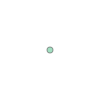

In [31]:
from shapely.geometry import Point
latitude = -23.56
longitude = -46.59
Point(longitude,latitude)

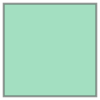

In [35]:
from shapely.geometry import Polygon
Polygon([[0,0], [1,0], [1,1], [0,1], [0,0]])

In [37]:
Polygon([[0,0], [1,0], [1,1], [0,1], [0,0]]).contains(Point(0.1,0.9))

True

In [39]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 34.8 MB/s 
     |████████████████████████████████| 16.7 MB 404 kB/s 


Banco de dados da geometria dos setores censitários

In [71]:
import geopandas as gpd

setor_censo = gpd.read_file(r"/content/drive/MyDrive/Aulas/Data-Science/Setor/35SEE250GC_SIR.shp")
setor_censo

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68291,133873.00,355730305000008,URBANO,35573030500,None,355730305,ESTIVA GERBI,3557303,ESTIVA GERBI,MOJI-MIRIM,CAMPINAS,None,None,68292,"POLYGON ((-46.95301 -22.28885, -46.95401 -22.2..."
68292,133874.00,355730305000009,URBANO,35573030500,None,355730305,ESTIVA GERBI,3557303,ESTIVA GERBI,MOJI-MIRIM,CAMPINAS,None,None,68293,"POLYGON ((-46.97846 -22.22911, -46.97545 -22.2..."
68293,133875.00,355730305000010,URBANO,35573030500,None,355730305,ESTIVA GERBI,3557303,ESTIVA GERBI,MOJI-MIRIM,CAMPINAS,None,None,68294,"POLYGON ((-46.97514 -22.26519, -46.97416 -22.2..."
68294,133876.00,355730305000011,RURAL,35573030500,None,355730305,ESTIVA GERBI,3557303,ESTIVA GERBI,MOJI-MIRIM,CAMPINAS,None,None,68295,"POLYGON ((-46.94954 -22.26701, -46.94888 -22.2..."


Ao utilizar a área dos setores é possível localizar em qual deles determinada latitude e longitude estão.

In [70]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]

dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo = dados_geo[dados_geo["setor_censo"].notna()]
dados_geo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_vendas,...,Valor_vendas_float,Valor_vendas_milhoes,Valor_metragem,Apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,...,3700000.00,3.70,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,...,380000.00,0.38,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050
39,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,...,1980000.00,1.98,4500.00,rua graham bell,rua graham bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169
40,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000,R$,850.000,...,850000.00,0.85,5862.07,rua francisco paulo,rua francisco paulo,3306050.00,-23.52,-46.52,POINT (-46.5164525 -23.5222541),355030859000013
41,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000,R$,450.000,...,450000.00,0.45,3000.00,rua guilherme valente,rua guilherme valente,5818280.00,-23.66,-46.73,POINT (-46.7339399 -23.6647336),355030846000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89955,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,R$ 960.000,R$,960.000,...,960000.00,0.96,6114.65,rua pedro teixeira,rua pedro teixeira,4550010.00,-23.60,-46.68,POINT (-46.6783021 -23.6035167),355030835000027
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,...,1500000.00,1.50,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,...,665000.00,0.67,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,...,1050000.00,1.05,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052


Como sabemos onde está cada setor, podemos unir o censo com o banco de dados principal

In [108]:
dados_geo.setor_censo = (dados_geo.setor_censo).astype(str).astype(int)
dados_vendas_censo = pd.merge(left = dados_geo, right = ibge, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_vendas,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
1,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
2,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
3,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000,R$,850.000,...,2.95,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75
4,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000,R$,450.000,...,3.23,2.13,1613.93,33332390.49,1721.15,35369361.97,880.61,12700171.03,1333.63,18640212.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,R$ 960.000,R$,960.000,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
3893,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
3894,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
3895,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33
